# Arps Decline Curve Analysis using `arpsdca` 

_Arps Equation_:
$$q(t) =  \frac{qi} {(1+b d_{i} t)^{1-b}}$$

## Predicting EUR using `predict_arps`

`prd_time_series`: (str) a production time series in form of a csv

`well_nm`: (str, int) the API, or well ID/ name 

`liquid`: (str) the type of liquid to calculuate EUR

`qi_min`: (int) qi lower bound 

`b_min`: (int) bi lower bound 

`di_min`: (int) di lower bound 

`qi_max`: (int) qi upper bound  

`b_max`: (int) bi upper bound 

`di_max`: (int) di upper bound 

`sigma_fit`: (int) significance level for fitted curve. ** for 95% CL, sigma = 2

`sigma_pred`: (int) significance level for predicted curve

`pred_interval`: (float) future number of days to predict 

In [6]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

[[Model]]
    Model(hyperbolic_equation)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 82
    # data points      = 2801
    # variables        = 3
    chi-square         = 853795.723
    reduced chi-square = 305.145005
    Akaike info crit   = 16026.9230
    Bayesian info crit = 16044.7362
[[Variables]]
    qi:  331.553080 +/- 2.78476755 (0.84%) (init = 1000)
    b:   0.35746327 +/- 0.01594711 (4.46%) (init = 3)
    di:  0.00429502 +/- 9.3789e-05 (2.18%) (init = 20)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, di)  =  0.872
    C(qi, di) =  0.802
    C(qi, b)  =  0.562
R-Square:  92.538%
EUR:  120607.6343883825


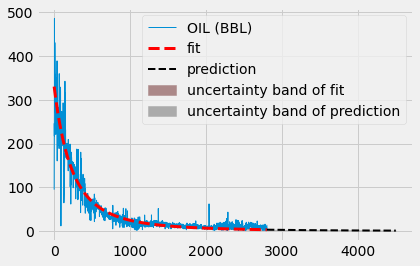

In [7]:
from arps.predict_arps import predict_arps

predict_arps(
    prd_time_series='daily_production', 
    well_nm = 'Well # 638',
    liquid='OIL (BBL)', 
    qi_min=220, 
    b_min=.3, 
    di_min=1e-5,
    qi_max=1000, 
    b_max=3, 
    di_max=20,
    sigma_fit=2,
    sigma_pred=2,
    pred_interval=4500
)

## Automate DCA on a production time series dataset using `fit_arps`

In [8]:
from arps.fit_arps import execute_arps

Hyperbolic Fit Curve-fitted Variables:
r2=80.852% qi=232.17104942176982, b=0.6711106177972999, di=0.005657497850020256


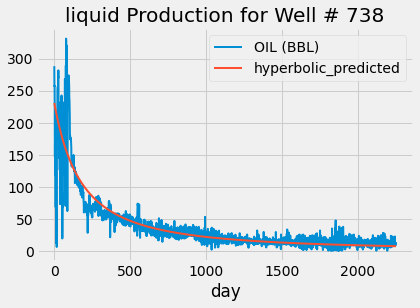

Hyperbolic Fit Curve-fitted Variables:
r2=92.538% qi=331.55325145396256, b=0.3574411159815094, di=0.004294962690315902


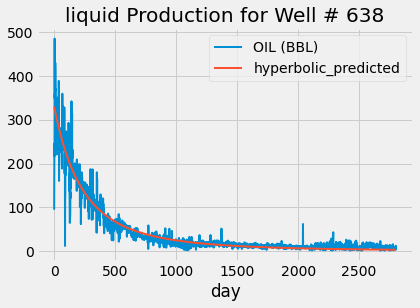

Hyperbolic Fit Curve-fitted Variables:
r2=90.536% qi=384.0920826955829, b=0.16572440913361555, di=0.0019651274172315155


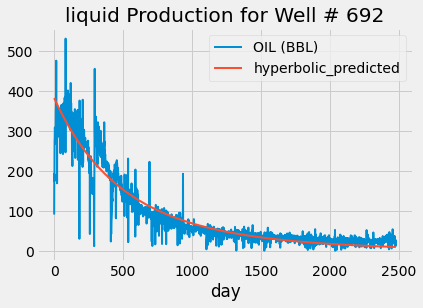

Hyperbolic Fit Curve-fitted Variables:
r2=87.648% qi=277.7865574992587, b=0.7490181911778674, di=0.007009581529317569


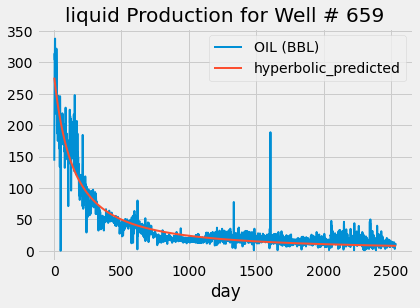

Hyperbolic Fit Curve-fitted Variables:
r2=84.193% qi=295.386105952216, b=0.2643584916407591, di=0.003229697523349128


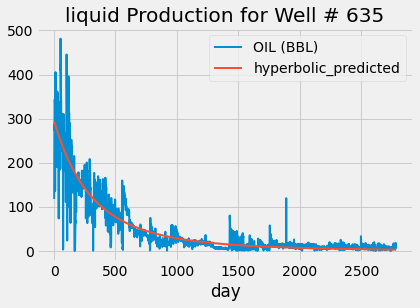

In [9]:
execute_arps(
    prod_data = pd.read_csv('daily_production.csv'),
    days = 100,
    liquid = 'OIL (BBL)',
    b_upper = 2.5,
    di_bound = 20
)